## Question 1
### (a) & (b)

In [1]:
library("faraway")
data(wbca)
?wbca

In [28]:
bin_reg = glm(cbind(Class, 1 - Class)~., family = binomial, data=wbca)

In [29]:
summary(bin_reg)


Call:
glm(formula = cbind(Class, 1 - Class) ~ ., family = binomial, 
    data = wbca)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48282  -0.01179   0.04739   0.09678   3.06425  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.16678    1.41491   7.892 2.97e-15 ***
Adhes       -0.39681    0.13384  -2.965  0.00303 ** 
BNucl       -0.41478    0.10230  -4.055 5.02e-05 ***
Chrom       -0.56456    0.18728  -3.014  0.00257 ** 
Epith       -0.06440    0.16595  -0.388  0.69795    
Mitos       -0.65713    0.36764  -1.787  0.07387 .  
NNucl       -0.28659    0.12620  -2.271  0.02315 *  
Thick       -0.62675    0.15890  -3.944 8.01e-05 ***
UShap       -0.28011    0.25235  -1.110  0.26699    
USize        0.05718    0.23271   0.246  0.80589    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 881.388  on 680  degrees of freedom
Residual d

### (c) step function to find parsimonius model

In [30]:
bin_reg2 = step(bin_reg)
summary(bin_reg2)

Start:  AIC=109.46
cbind(Class, 1 - Class) ~ Adhes + BNucl + Chrom + Epith + Mitos + 
    NNucl + Thick + UShap + USize

        Df Deviance    AIC
- USize  1   89.523 107.52
- Epith  1   89.613 107.61
- UShap  1   90.627 108.63
<none>       89.464 109.46
- Mitos  1   93.551 111.55
- NNucl  1   95.204 113.20
- Adhes  1   98.844 116.84
- Chrom  1   99.841 117.84
- BNucl  1  109.000 127.00
- Thick  1  110.239 128.24

Step:  AIC=107.52
cbind(Class, 1 - Class) ~ Adhes + BNucl + Chrom + Epith + Mitos + 
    NNucl + Thick + UShap

        Df Deviance    AIC
- Epith  1   89.662 105.66
- UShap  1   91.355 107.36
<none>       89.523 107.52
- Mitos  1   93.552 109.55
- NNucl  1   95.231 111.23
- Adhes  1   99.042 115.04
- Chrom  1  100.153 116.15
- BNucl  1  109.064 125.06
- Thick  1  110.465 126.47

Step:  AIC=105.66
cbind(Class, 1 - Class) ~ Adhes + BNucl + Chrom + Mitos + NNucl + 
    Thick + UShap

        Df Deviance    AIC
<none>       89.662 105.66
- UShap  1   91.884 105.88
- Mitos  1   


Call:
glm(formula = cbind(Class, 1 - Class) ~ Adhes + BNucl + Chrom + 
    Mitos + NNucl + Thick + UShap, family = binomial, data = wbca)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.44161  -0.01119   0.04962   0.09741   3.08205  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  11.0333     1.3632   8.094 5.79e-16 ***
Adhes        -0.3984     0.1294  -3.080  0.00207 ** 
BNucl        -0.4192     0.1020  -4.111 3.93e-05 ***
Chrom        -0.5679     0.1840  -3.085  0.00203 ** 
Mitos        -0.6456     0.3634  -1.777  0.07561 .  
NNucl        -0.2915     0.1236  -2.358  0.01837 *  
Thick        -0.6216     0.1579  -3.937 8.27e-05 ***
UShap        -0.2541     0.1785  -1.423  0.15461    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 881.388  on 680  degrees of freedom
Residual deviance:  89.662  on 673  degrees of freedom
AIC: 105.

### (d) predict

`type='link'` is important

In [31]:
newdata = list(Adhes=1, BNucl=1, Chrom=3, Mitos=1, NNucl=1, Thick=4, UShap=1)
(x = predict(bin_reg2, newdata = newdata, type = 'link', se.fit = TRUE))

$fit
       1 
4.834428 

$se.fit
[1] 0.5815185

$residual.scale
[1] 1

In [32]:
c(x$fit-1.96*x$se.fit, x$fit, x$fit+1.96*x$se.fit)

1        1        1 
3.694652 4.834428 5.974204

In [33]:
ilogit(c(x$fit-1.96*x$se.fit, x$fit, x$fit+1.96*x$se.fit))

1         1         1 
0.9757467 0.9921115 0.9974629

$\beta \sim MVN$ -> $x^T\beta \sim MVN$
get a CI based on MVN, so transform into reponse scale <br/>
$g^{-1}(x^T\hat{\beta})$ with s.e. = *** <br/>
and use point estimate +/- quantile * se
but not good, as $g^{-1}(x^T\hat{\beta})$ doesn't follow MVN (too many approximation)

If you only need point estimate

In [34]:
predict(bin_reg2, newdata = newdata, type = 'response')

1 
0.9921115

### (e) false negative

In [41]:
pfit = predict(bin_reg2, type = 'response')

In [44]:
(false_neg = sum(pfit >= 0.5 & !wbca$Class)/sum(!wbca$Class))

[1] 0.04621849

In [45]:
(false_pos = sum(pfit < 0.5 &  wbca$Class)/sum(wbca$Class))

[1] 0.02031603

### (f) cutoff = 0.9

In [46]:
(false_neg = sum(pfit >= 0.9 & !wbca$Class)/sum(!wbca$Class))

[1] 0.004201681

In [47]:
(false_pos = sum(pfit < 0.9 &  wbca$Class)/sum(wbca$Class))

[1] 0.03611738

Clearly there is a trade-off between false positives and false negatives. Where you choose the cut-off depends on the relative costs (individial and societal) in each case. For medical tests we usually prefer to reduce the false negative rate at the expense of increasing the false positive rate, especially for a screening test, where there is the opportunity for further testing following a positive result.

For medical test we usually prefer to reduce the false negative rate.

## Question 2
### (a)

In [48]:
?pima

In [51]:
missing <- with(pima, missing <- glucose==0 | diastolic==0 | triceps==0 | bmi == 0)
pima <- pima[!missing,]

In [54]:
bin_reg = glm(cbind(test, 1 - test)~., family = binomial, data=pima)
summary(bin_reg)


Call:
glm(formula = cbind(test, 1 - test) ~ ., family = binomial, data = pima)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8627  -0.6639  -0.3672   0.6347   2.4942  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.677562   1.005400  -9.626  < 2e-16 ***
pregnant     0.121235   0.043926   2.760 0.005780 ** 
glucose      0.037439   0.004765   7.857 3.92e-15 ***
diastolic   -0.009316   0.010446  -0.892 0.372494    
triceps      0.006341   0.014853   0.427 0.669426    
insulin     -0.001053   0.001007  -1.046 0.295651    
bmi          0.085992   0.023661   3.634 0.000279 ***
diabetes     1.335764   0.365771   3.652 0.000260 ***
age          0.026430   0.013962   1.893 0.058371 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 676.79  on 531  degrees of freedom
Residual deviance: 465.23  on 523  degrees of freedom
AIC: 483.23

Numb

### (b) correlation

In [55]:
round(cor(pima), 3)

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
pregnant,1.000,0.125,0.205,0.095,-0.007,0.009,0.007,0.641,0.253
glucose,0.125,1.000,0.219,0.227,0.460,0.247,0.166,0.279,0.504
diastolic,0.205,0.219,1.000,0.226,0.007,0.307,0.008,0.347,0.183
triceps,0.095,0.227,0.226,1.000,0.126,0.647,0.119,0.161,0.255
insulin,-0.007,0.460,0.007,0.126,1.000,0.191,0.152,0.081,0.212
bmi,0.009,0.247,0.307,0.647,0.191,1.000,0.151,0.073,0.301
diabetes,0.007,0.166,0.008,0.119,0.152,0.151,1.000,0.072,0.233
age,0.641,0.279,0.347,0.161,0.081,0.073,0.072,1.000,0.315
test,0.253,0.504,0.183,0.255,0.212,0.301,0.233,0.315,1.000


From the correlation, test and diastolic are positive correlated (0.183)<br/>

### (c) Predict

In [60]:
(x <- predict(bin_reg, newdata = list(pregnant=1, glucose=99, diastolic=64, triceps = 22, insulin = 76, bmi = 27, diabetes = 0.25, age = 25), type="link", se.fit=TRUE))

$fit
        1 
-3.070183 

$se.fit
[1] 0.270126

$residual.scale
[1] 1

In [59]:
ilogit(c(x$fit-2*x$se.fit, x$fit, x$fit+2*x$se.fit))

1          1          1 
0.02632817 0.04435407 0.07378636

## Question 3
### (a)

In [61]:
data(orings)
logitmod <- glm(cbind(damage,6-damage) ~ temp, family=binomial, orings)

# log-likelihood function
logL <- function(beta, orings) {
    eta <- cbind(1, orings$temp) %*% beta
    return( sum(orings$damage*eta - 6*log(1 + exp(eta))) )
}

In [66]:
# log-likelihood ratio for beta = c(a, b) against beta = betafit
logLR <- function(a, b, betafit, orings){
    # H0: beta = c(a, b)
    # 2 log (L(beta,mle)/L(beta) ) = 2 logL(beta.mle) - 2logL(beta) ~ chisq(2) under H0
    # if 2log(LR) < qchisq(0.95, 2) -> do not reject as inside confidence region
    2*logL(betafit, orings) - 2*logL(c(a, b), orings)
}

In [68]:
# interested in c(a, b) such that f(a, b, ...) <= qchisq(0.95, 2)
a_vec <- seq(2, 22, 0.1)
b_vec <- seq(-0.4, -0.05, .005)
z <- matrix(0, nrow = length(a_vec), ncol = length(b_vec))

In [69]:
for (i in 1:length(a_vec)) {
    for (j in 1:length(b_vec)) {
        z[i, j] <- logLR(a_vec[i], b_vec[j], logitmod$coefficients, orings)
    }
}
# Alternatively
# z <- outer(a_vec, b_vec, Vectorize(logLR, c("a", "b")), betafit = logitmod$coefficients, orings = orings)

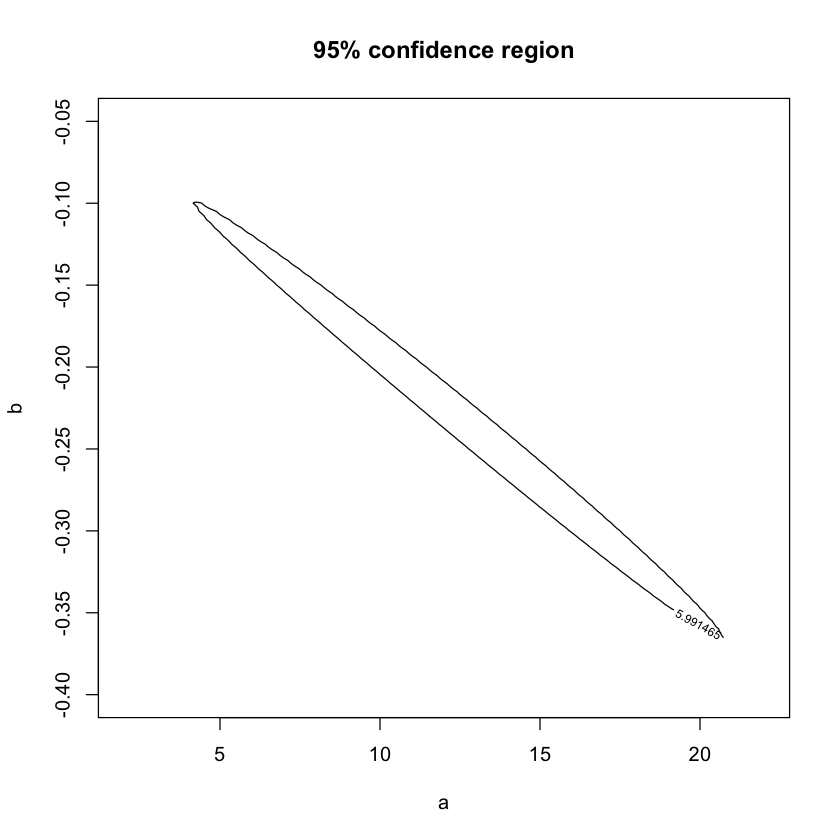

In [70]:
contour(a_vec, b_vec, z, levels = qchisq(0.95, 2), xlab="a", ylab="b", main="95% confidence region")